In [466]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Cargar el archivo Excel
df = pd.read_csv('base-de-datos-mets-opt_cleaned.csv', encoding='latin-1')


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EXPEDIENTE                  466 non-null    int64  
 1   EDAD                        466 non-null    float64
 2   SEXO                        466 non-null    object 
 3   TUMOR PRIMARIO              466 non-null    object 
 4   SUBTIPO HISTOLOGICO         466 non-null    object 
 5   PERFIL MOLECULAR            466 non-null    object 
 6   TAMAÑO (mm)                 466 non-null    object 
 7   LOCALIZACION                466 non-null    object 
 8   CIRUGIA PREVIA              466 non-null    object 
 9   SRS                         466 non-null    object 
 10  DOSIS (Gy)                  466 non-null    int64  
 11  TECNICA                     466 non-null    object 
 12  TRATAMIENTO SISTEMICO       466 non-null    object 
 13  RESPUESTA (CRITERIOS RANO)  466 non

##Relación entre las columnas "TUMOR PRIMARIO" y "LOCALIZACIÓN"

In [468]:
df_excel = pd.read_excel('BASE DE DATOS METS localizacion correg.xlsx', sheet_name='PX INCLUIDOS')  
df['LOCALIZACION'] = df_excel['LOCALIZACIÓN']
df['LOCALIZACION'].unique()

reemplazos = {
    'PARIETAL IZQ': 'PARIETAL IZQUIERDA',
    'ORBITARIA IZQUIERDA': 'ORBITA IZQUIERDA',
    'CEERBELO ': 'CEREBELO',
    'CEREBELO ': 'CEREBELO',
    'ÓRBITA IZQUIERDA': 'ORBITA IZQUIERDA'
   }

df['LOCALIZACION'] = df['LOCALIZACION'].replace(reemplazos)
df['LOCALIZACION'].unique()



array(['PARIETAL IZQUIERDA', 'FRONTAL DERECHA', 'CEREBELO',
       'FRONTAL IZQUIERDA', 'PARIETAL DERECHA', 'ORBITA IZQUIERDA',
       'TENTORIAL', 'TALLO ', 'TEMPORAL IZQUIERDA', 'TEMPORAL DERECHA',
       'OCCIPITAL DERECHA', 'OCCIPITAL IZQUIERDA', 'VENTRICULO ',
       'INSULA', 'CEREBELO DERECHA', 'HOLOCRANEO'], dtype=object)


Resultados del Test Chi-cuadrado:
Estadístico Chi2: 233.2109
Valor p: 0.1302

Tabla de contingencia:
LOCALIZACION            CEREBELO  CEREBELO DERECHA  FRONTAL DERECHA  \
TUMOR PRIMARIO                                                        
CANCER CERVICOUTERINO          0                 0                0   
CANCER DE COLON                0                 0                0   
CANCER DE ENDOMETRIO           1                 0                4   
CANCER DE ESOFAGO              0                 0                0   
CANCER DE MAMA                51                 0               15   
CANCER DE OVARIO               6                 0                2   
CANCER DE PROSTATA             0                 0                0   
CANCER DE PULMON              22                 1               25   
CANCER DE TIROIDES             5                 0                6   
CANCER RENAL                   7                 0                5   
CANCER TESTICULAR              1              

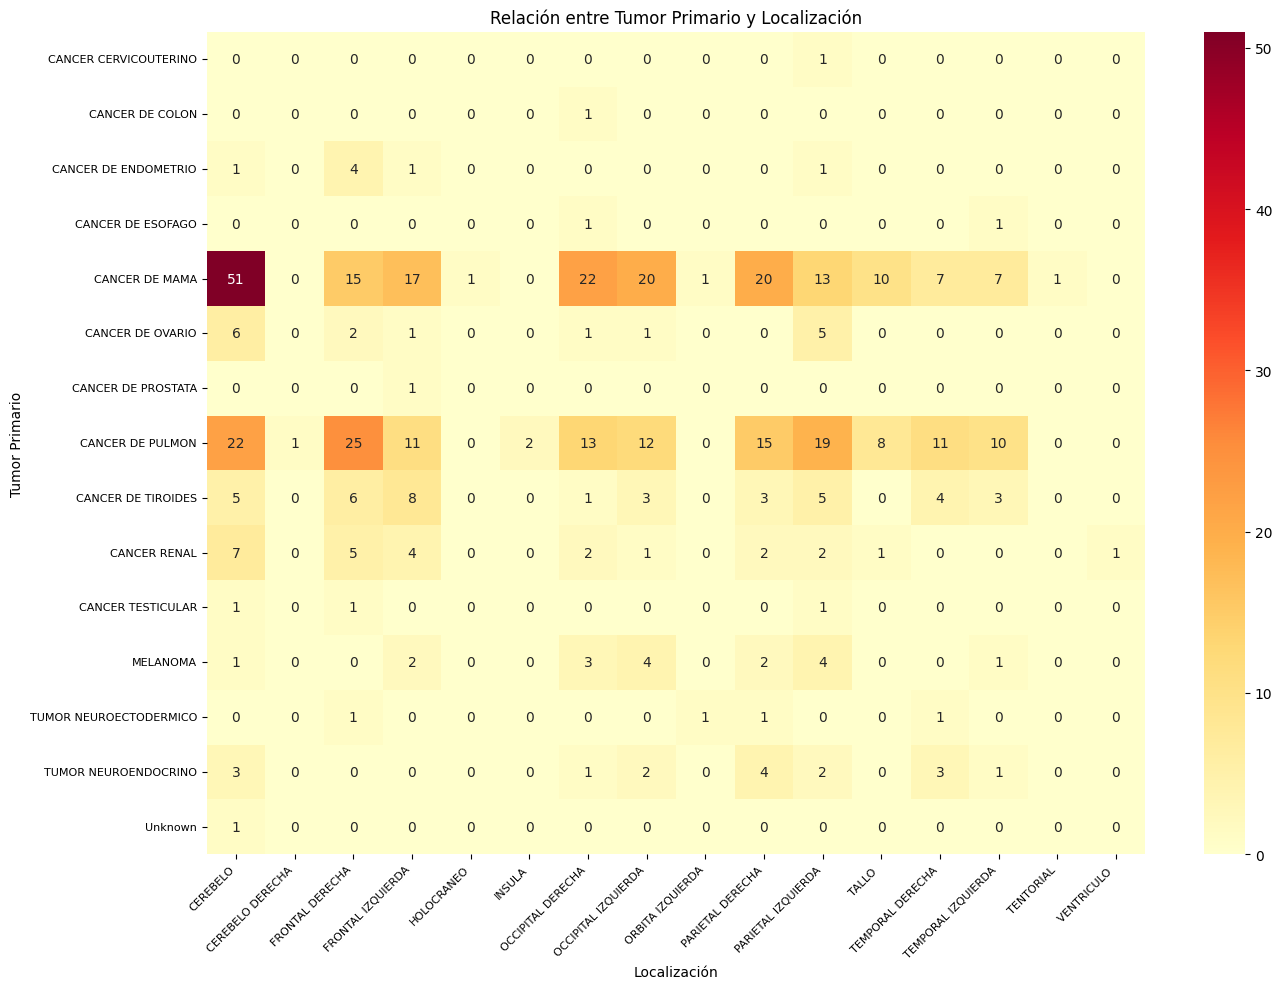

In [469]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['TUMOR PRIMARIO'], df['LOCALIZACION'])

# Realizar prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre Tumor Primario y Localización')
plt.xlabel('Localización')
plt.ylabel('Tumor Primario')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()
     

In [470]:
df['DOSIS (Gy)'].unique()



array([16, 20, 22, 24,  8, 18,  7, 14, 15,  5,  9, 19,  6,  2, 21, 23,  3,
        4])

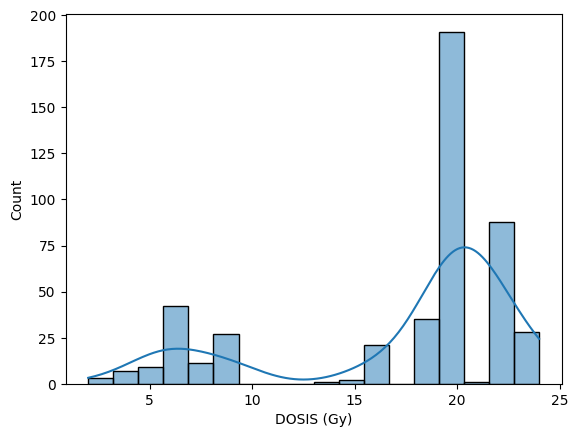

In [471]:
# Analizando la variable 'DOSIS (Gy)', iniciando con una grafica para conocer su distribución 
sns.histplot(df['DOSIS (Gy)'], kde=True)  # kde=True agrega una curva de densidad
plt.show()

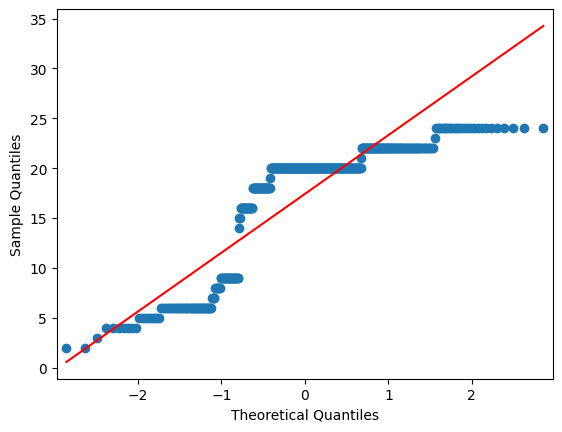

In [472]:
# Grafico Q-Q (cuantil-cuantil) que compara los cuantiles de la distribución de la 'dosis' con los cuantiles de una distribución normal teórica. Si los puntos en el gráfico se alinean en una línea recta, es un indicio de una distribución normal.
qqplot(df['DOSIS (Gy)'], line='s')  # line='s' agrega una línea de referencia
plt.show()

In [473]:
# Dada la bimodalidad que se aprecia, se utilizará la prueba de Mann-Whitney U
# Separa los datos en dos grupos según la dosis (baja o alta)
grupo_baja_dosis = df[df['DOSIS (Gy)'] < 10]['RESPUESTA (CRITERIOS RANO)']
grupo_alta_dosis = df[df['DOSIS (Gy)'] >= 10]['RESPUESTA (CRITERIOS RANO)']

# Realiza la prueba de Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(grupo_baja_dosis, grupo_alta_dosis)

print(f"U-statistic: {u_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


Resultados del Test Chi-cuadrado:
Estadístico Chi2: 110.8590
Valor p: 0.0000

Tabla de contingencia:
RESPUESTA (CRITERIOS RANO)  ESTABLE  PROGRESION  RESPUESTA COMPLETA  \
DOSIS (Gy)                                                            
2                                 1           0                   0   
3                                 1           0                   0   
4                                 1           0                   1   
5                                 4           1                   1   
6                                14           3                   5   
7                                 3           0                   0   
8                                 3           2                   1   
9                                 7           1                   0   
14                                0           0                   0   
15                                1           1                   0   
16                                6           

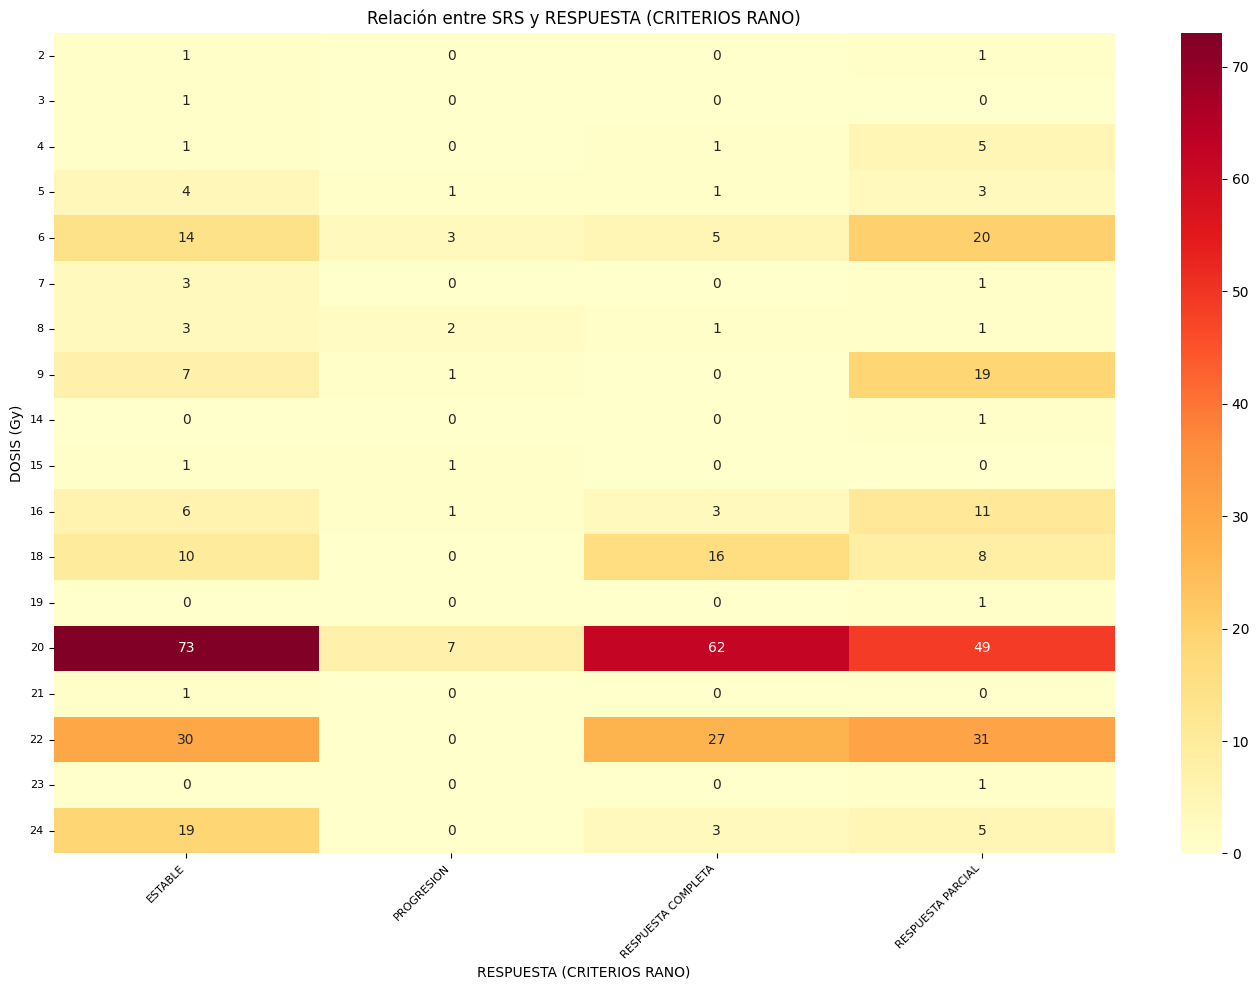

In [ ]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['DOSIS (Gy)'], df['RESPUESTA (CRITERIOS RANO)'])

# Realizar prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre SRS y RESPUESTA (CRITERIOS RANO)')
plt.xlabel('RESPUESTA (CRITERIOS RANO)')
plt.ylabel('DOSIS (Gy)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

ANOVA para determinar si hay diferencias significativas en la dosis media entre las diferentes categorías de respuesta.

                            OLS Regression Results                            
Dep. Variable:        Q("DOSIS (Gy)")   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.12
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.81e-06
Time:                        22:42:18   Log-Likelihood:                -1473.1
No. Observations:                 466   AIC:                             2954.
Df Residuals:                     462   BIC:                             2971.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

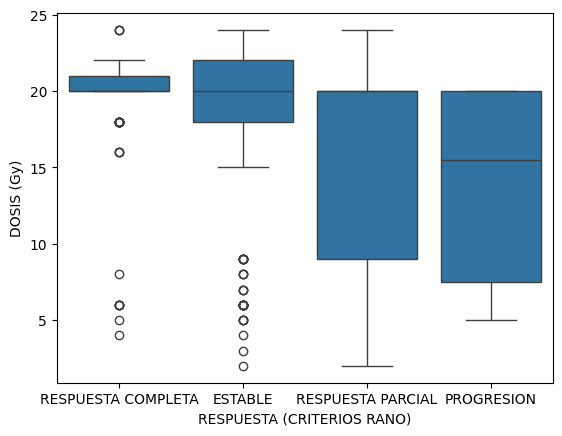

In [ ]:
model = sm.ols('Q("DOSIS (Gy)") ~ C(Q("RESPUESTA (CRITERIOS RANO)"))', data=df).fit()
print(model.summary())

sns.boxplot(x='RESPUESTA (CRITERIOS RANO)', y='DOSIS (Gy)', data=df)
plt.show()

Resumen general:

Dep. Variable: La variable dependiente es 'DOSIS (Gy)', que es la variable que estás tratando de predecir o explicar.
R-squared: El R-cuadrado es 0.062, lo que significa que el modelo explica el 6.2% de la variabilidad en la dosis. Este valor es relativamente bajo, lo que sugiere que el modelo no tiene un gran poder predictivo.
Adj. R-squared: El R-cuadrado ajustado es 0.056, que es una medida del R-cuadrado que tiene en cuenta el número de predictores en el modelo.
F-statistic: El estadístico F es 10.12, y su valor p es muy bajo (1.81e-06). Esto indica que el modelo es estadísticamente significativo en general, lo que significa que al menos uno de los predictores tiene una relación significativa con la variable dependiente.
Coeficientes:

Intercept: El intercepto es 17.8678. Este es el valor predicho de la dosis cuando todas las variables predictoras son 0. En este caso, representa la dosis media para la categoría de referencia de 'RESPUESTA (CRITERIOS RANO)', que probablemente sea 'ESTABLE' (si no se especifica otra categoría de referencia).
C(Q("RESPUESTA (CRITERIOS RANO)"))[T.PROGRESION]: El coeficiente para 'PROGRESION' es -4.1803. Esto significa que, en comparación con la categoría de referencia, la dosis media para los pacientes con 'PROGRESION' es 4.1803 unidades menor. El valor p es 0.005, lo que indica que esta diferencia es estadísticamente significativa.
C(Q("RESPUESTA (CRITERIOS RANO)"))[T.RESPUESTA COMPLETA]: El coeficiente para 'RESPUESTA COMPLETA' es 1.3675. Esto significa que, en comparación con la categoría de referencia, la dosis media para los pacientes con 'RESPUESTA COMPLETA' es 1.3675 unidades mayor. El valor p es 0.046, lo que indica que esta diferencia es estadísticamente significativa (aunque menos que para 'PROGRESION').
C(Q("RESPUESTA (CRITERIOS RANO)"))[T.RESPUESTA PARCIAL]: El coeficiente para 'RESPUESTA PARCIAL' es -1.9379. Esto significa que, en comparación con la categoría de referencia, la dosis media para los pacientes con 'RESPUESTA PARCIAL' es 1.9379 unidades menor. El valor p es 0.002, lo que indica que esta diferencia es estadísticamente significativa.
Otras estadísticas:

Omnibus, Prob(Omnibus), Jarque-Bera (JB), Skew, Kurtosis: Estas estadísticas se utilizan para evaluar la normalidad de los residuos del modelo. Los valores sugieren que los residuos pueden no estar distribuidos normalmente.
Durbin-Watson: Esta estadística se utiliza para evaluar la autocorrelación de los residuos. El valor de 1.096 está cerca de 2, lo que sugiere que no hay una autocorrelación significativa.
Conclusión:

El modelo sugiere que existe una relación estadísticamente significativa entre la dosis y la respuesta al tratamiento, aunque el modelo no explica una gran parte de la variabilidad en la dosis. Los pacientes con 'PROGRESION' y 'RESPUESTA PARCIAL' tienden a tener dosis más bajas que la categoría de referencia, mientras que los pacientes con 'RESPUESTA COMPLETA' tienden a tener dosis más altas.

Es importante tener en cuenta que este análisis solo muestra una asociación, y no necesariamente una relación causal. Podrían haber otros factores que influyan tanto en la dosis como en la respuesta al tratamiento.

In [ ]:
# Crea una tabla de contingencia
contingency_table = pd.crosstab(df['DOSIS (Gy)'] < 11, df['RESPUESTA (CRITERIOS RANO)'])

# Realiza la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2:.2f}")
print(f"P-value: {p:.3f}")

Chi-cuadrado: 30.69
P-value: 0.000


 Los resultados de la prueba de Chi-cuadrado sugieren que existe una asociación significativa entre la dosis y la respuesta. Esto significa que la dosis está relacionada con la probabilidad de tener una respuesta "Buena" o "Favorable".

In [ ]:
# Filtrar filas que no tengan valores nulos en la columna 'perfil molecular'
print(df['RESPUESTA (CRITERIOS RANO)'].unique())

# Asignar a la columna 'RESPUESTA (CRITERIOS RANO)' valor binario
def map_response(value):
    if value.strip().upper() in ['ESTABLE', 'PROGRESIÓN']:
        return 0
    else:
        return 1

df['RESPUESTA_BINARIA'] = df['RESPUESTA (CRITERIOS RANO)'].apply(map_response)

print(df['PERFIL MOLECULAR'].unique())



['RESPUESTA COMPLETA' 'ESTABLE' 'RESPUESTA PARCIAL' 'PROGRESION']
['TRIPLE NEGATIVO' 'Unknown' ' ' 'HER2+++' 'LUMINAL B' 'EGFR+'
 'AG EPITELIAL MEMBRANA +. CITOKERATINA +. VIMENTINA +' 'LUMINAL A'
 'HMB45 +++. S-100 +++. CITOQUERATINA -' 'ALK MUTADO'
 'CITOQUERATINA APM+++. AG EPITELIAL DE MEMBRANA+. VIMENTINA-' 'CA 125+'
 'CITOQUERATINA PA +++. RE-. RP-. P53+++. SMH2++. PTEM-']


                            OLS Regression Results                            
Dep. Variable:        Q("DOSIS (Gy)")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.597
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.207
Time:                        08:32:05   Log-Likelihood:                -1487.1
No. Observations:                 466   AIC:                             2978.
Df Residuals:                     464   BIC:                             2986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

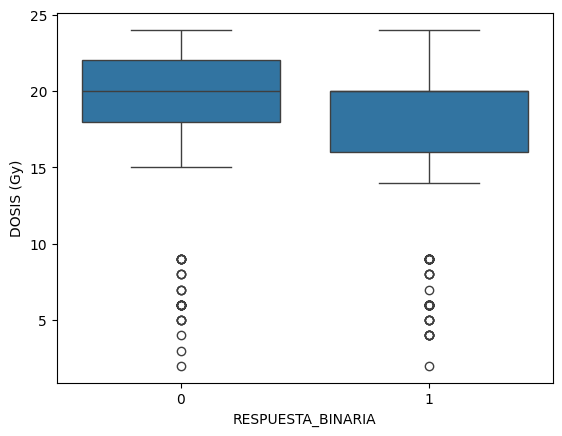

In [ ]:
#ANOVA Dosis, respuesta binaria
model = sm.ols('Q("DOSIS (Gy)") ~ C(Q("RESPUESTA_BINARIA"))', data=df).fit()
print(model.summary())

sns.boxplot(x='RESPUESTA_BINARIA', y='DOSIS (Gy)', data=df)
plt.show()

In [ ]:
# Prueba de Fisher 
# Crea la tabla de contingencia con la variable binaria
contingency_table = pd.crosstab(df['DOSIS (Gy)'] < 11, df['RESPUESTA_BINARIA'])

# Realiza la prueba exacta de Fisher
oddsratio, p_value = fisher_exact(contingency_table)

print(f"Odds ratio: {oddsratio:.2f}")
print(f"P-value: {p_value:.3f}")

Odds ratio: 1.18
P-value: 0.559


In [ ]:
# Asignar a la columna 'PERFIL MOLECULAR' valor binario
def map_response(value):
    if value.strip().upper() in ['TRIPLE NEGATIVO','HER2+++','LUMINAL B','EGFR+',
 'AG EPITELIAL MEMBRANA +. CITOKERATINA +. VIMENTINA +','LUMINAL A',
 'HMB45 +++. S-100 +++. CITOQUERATINA -', 'ALK MUTADO',
 'CITOQUERATINA APM+++. AG EPITELIAL DE MEMBRANA+. VIMENTINA-', 'CA 125+',
 'CITOQUERATINA PA +++. RE-. RP-. P53+++. SMH2++. PTEM-']:
        return 1
    else:
        return 0

df['PERFIL_BIN'] = df['PERFIL MOLECULAR'].apply(map_response)
df


,EXPEDIENTE,EDAD,SEXO,TUMOR PRIMARIO,SUBTIPO HISTOLOGICO,PERFIL MOLECULAR,TAMAÑO (mm),LOCALIZACION,CIRUGIA PREVIA,SRS,DOSIS (Gy),TECNICA,TRATAMIENTO SISTEMICO,RESPUESTA (CRITERIOS RANO),ID_unico,RESPUESTA_BINARIA,PERFIL_BIN
0,209406,55.0,F,CANCER DE MAMA,CARCINOMA DUCTAL INFILTRANTE,TRIPLE NEGATIVO,26,PARIETAL IZQUIERDA,SI,DU (dosis única),16,VMAT,CAPECITABINE,RESPUESTA COMPLETA,e96HApMhRRzzpkdmn6P9mE,1,1
1,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,Unknown,17,FRONTAL DERECHA,NO,DU (dosis única),20,VMAT,SORAFENIB,ESTABLE,jiUpYHPgJChs5dxVx4kTnb,0,0
2,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,Unknown,4.55,FRONTAL DERECHA,NO,DU (dosis única),22,VMAT,PAZOPANIB,RESPUESTA PARCIAL,oQBGYFGktspmfyVbCRN6Ko,1,0
3,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,Unknown,3.44,CEREBELO,NO,DU (dosis única),22,VMAT,PAZOPANIB,RESPUESTA PARCIAL,gi5T4QXUQieo8pZCWUjwak,1,0
4,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,Unknown,4.9,CEREBELO,NO,DU (dosis única),22,VMAT,PAZOPANIB,ESTABLE,RkDCT8sxFcELLtsADbRETW,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,299625,30.0,M,CANCER DE ESOFAGO,CARCINOMA DE CELULAS PEQUEÑAS,Unknown,10.7,OCCIPITAL DERECHA,NO,DU (dosis única),22,VMAT,PANITUMUMAB + FLUOROURACIL. LEUCOVORIN. IRINIT...,RESPUESTA COMPLETA,CodsnLTDYiaQoWvYHDHsAY,1,0
462,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,Unknown,21.3,FRONTAL IZQUIERDA,NO,DU (dosis única),16,VMAT,AFATINIB,RESPUESTA PARCIAL,mwWaLFhrxRsKMyC4qNsfGW,1,0
463,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,Unknown,15.5,TEMPORAL DERECHA,NO,DU (dosis única),22,VMAT,AFATINIB,RESPUESTA PARCIAL,ggmFn9ACvmHdZRuaXzKAuh,1,0
464,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,Unknown,37.7,OCCIPITAL DERECHA,NO,HIPO FX,8,VMAT,AFATINIB,ESTABLE,LHgch26Rd4zg7ypL3c2TsT,0,0


In [ ]:
# Eliminar las columnas 'EXPEDIENTE' y 'NOMBRE'
df = df.drop(['RESPUESTA (CRITERIOS RANO)', 'ID_unico','PERFIL MOLECULAR'], axis=1)

# Crear una columna de ID única
df['ID'] = range(1, len(df) + 1)

# Reordenar columnas para que 'ID' esté al principio (opcional)
cols = ['ID'] + [col for col in df.columns if col != 'ID']
df = df[cols]


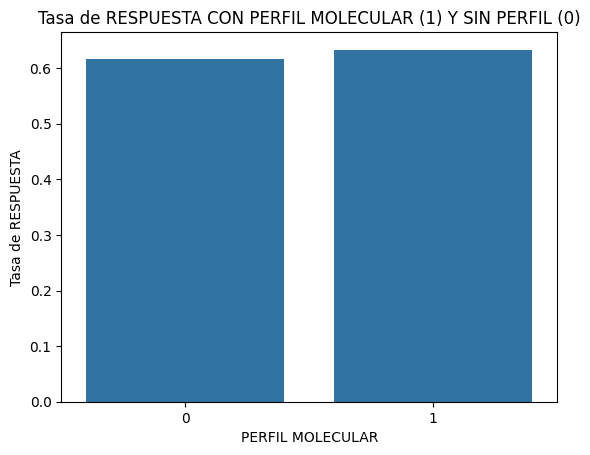

Resultado del test Chi-squared:
Chi2: 0.07739509665729014
p-value: 0.7808590326130299
Grados de libertad: 1
Frecuencias esperadas:
[[ 66.09012876 110.90987124]
 [107.90987124 181.09012876]]


In [ ]:
#Agrupar datos por PERFIL_BIN 
grouped_data = df.groupby('PERFIL_BIN')['RESPUESTA_BINARIA'].mean()

# Realizar prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['PERFIL_BIN'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualizar resultados
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Tasa de RESPUESTA CON PERFIL MOLECULAR (1) Y SIN PERFIL (0)')
plt.xlabel('PERFIL MOLECULAR')
plt.ylabel('Tasa de RESPUESTA')
plt.show()

#Mostrar resultados
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Conn base en el  valor p, se concluye que no existe una asociación estadísticamente significativa entre las dos variables, es decir las variables son independientes.

Analisis de la relación entre la variable SRS y la respuesta al tratamiento (Respuesta binaria)

In [ ]:
print(df['SRS'].unique())


['DU (dosis única)' 'HIPO FX' 'Unknown' 'CONV']


In [ ]:
# Crear la tabla de contingencia
contingencia = pd.crosstab(df['SRS'], df['RESPUESTA_BINARIA'])
print(contingencia)

RESPUESTA_BINARIA    0    1
SRS                        
CONV                 0    1
DU (dosis única)   141  226
HIPO FX             33   64
Unknown              0    1


In [ ]:
filtered_df = df[(df['SRS'] == 'CONV') | (df['SRS'] == 'Unknown')]
print(filtered_df )

      ID  EXPEDIENTE  EDAD SEXO    TUMOR PRIMARIO    SUBTIPO HISTOLOGICO  \
15    16      232385  46.0    M  CANCER DE PULMON  ADENOCARCINOMA ACINAR   
419  420      291905  58.0    M          MELANOMA  CARCINOMA EPIDERMOIDE   

    TAMAÑO (mm)     LOCALIZACION CIRUGIA PREVIA      SRS  DOSIS (Gy) TECNICA   \
15           21  FRONTAL DERECHA             SI  Unknown          20     VMAT   
419        44.9         CEREBELO             SI     CONV           2     VMAT   

    TRATAMIENTO SISTEMICO  RESPUESTA_BINARIA  PERFIL_BIN  
15                Unknown                  1           0  
419               Unknown                  1           0  


In [ ]:
# Crea una máscara booleana para identificar las filas a eliminar
mask = df['SRS'].isin(['CONV', 'Unknown'])

# Elimina las filas usando la máscara y el método drop()
df = df[~mask]  # El operador ~ invierte la máscara para seleccionar las filas que NO cumplen la condición

# Restablece el índice del DataFrame (opcional)
df.reset_index(drop=True, inplace=True)

In [ ]:
#Evaluando si existe asociación significativa entre las dos variables

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# Resultados
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Chi2: 1.8314701775138365
p-value: 0.608110734577963
Grados de libertad: 3
Frecuencias esperadas:
[[  0.37339056   0.62660944]
 [137.03433476 229.96566524]
 [ 36.21888412  60.78111588]
 [  0.37339056   0.62660944]]


No hay suficiente evidencia para concluir que las variables estan relacionadas.

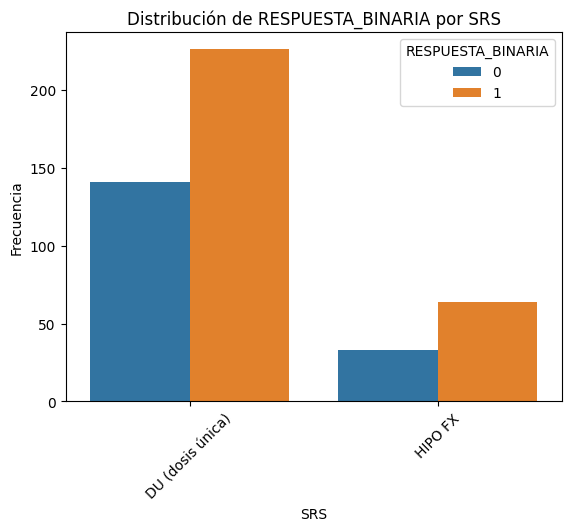

In [ ]:
# Gráfico de barras agrupado
sns.countplot(data=df, x='SRS', hue='RESPUESTA_BINARIA')
plt.title('Distribución de RESPUESTA_BINARIA por SRS')
plt.xlabel('SRS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Resultados del Test Chi-cuadrado:
Estadístico Chi2: 27.6834
Valor p: 0.0488

Tabla de contingencia:
RESPUESTA_BINARIA   0    1
DOSIS (Gy)                
2                   1    0
3                   1    0
4                   1    6
5                   4    5
6                  14   28
7                   3    1
8                   3    4
9                   7   20
14                  0    1
15                  1    1
16                  6   15
18                 10   24
19                  0    1
20                 73  117
21                  1    0
22                 30   58
23                  0    1
24                 19    8


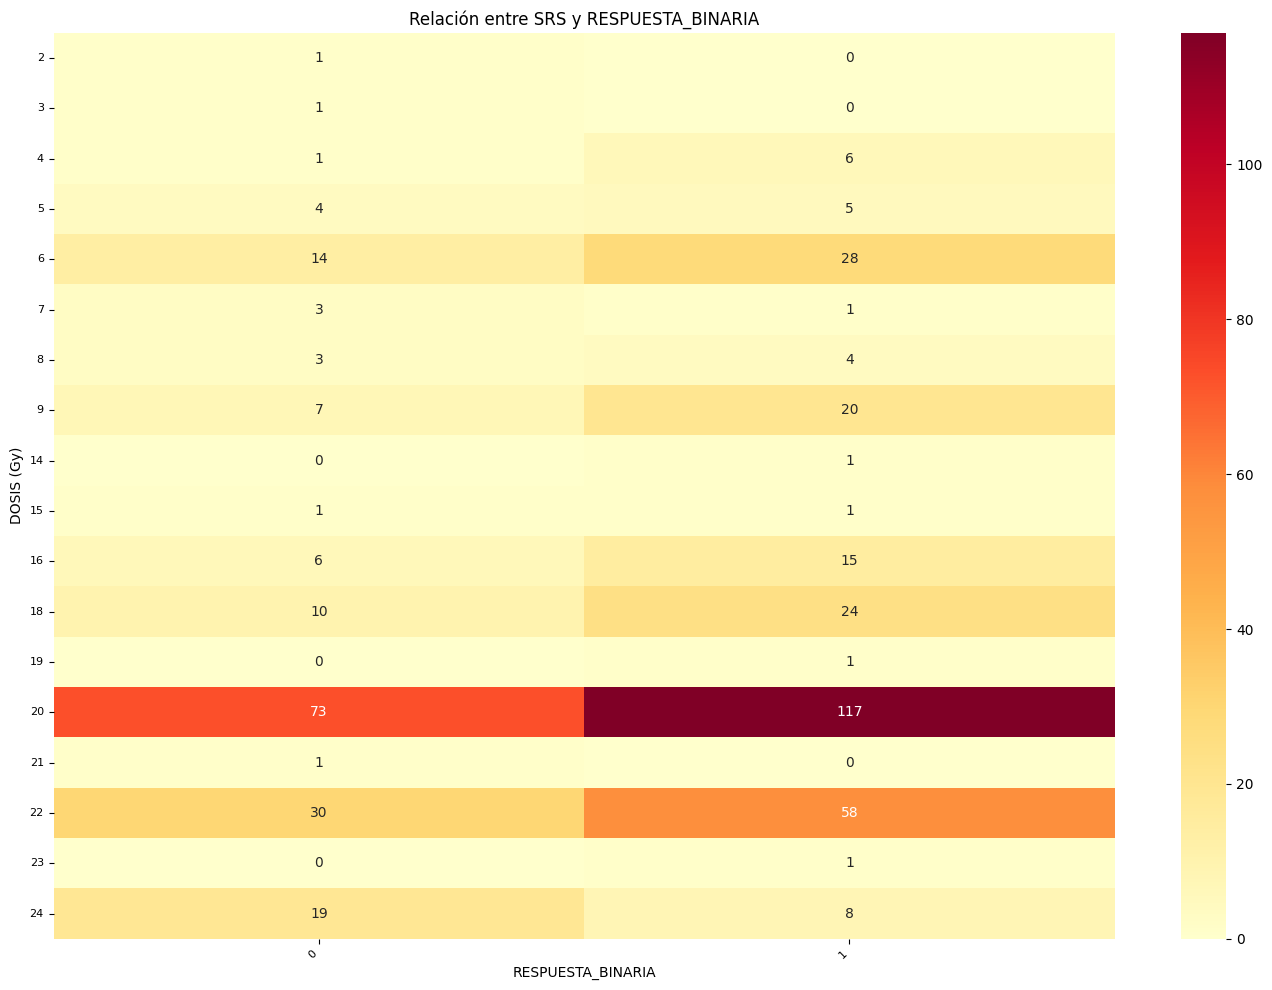

In [ ]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['DOSIS (Gy)'], df['RESPUESTA_BINARIA'])

# Realizar prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre SRS y RESPUESTA_BINARIA')
plt.xlabel('RESPUESTA_BINARIA')
plt.ylabel('DOSIS (Gy)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Verificar que datos tiene la columna tamaño
print(df['TAMAÑO (mm)'].unique())

['26' '17' '4.55' '3.44' '4.9' '5' '2.9' '9' '7' '57' '45' '38' '11.92'
 '29' '21' '11' '6' '12' '10' '3' '28' '47' '18' '13' '8' '14' '34' '20'
 '25' '36' '22' '35' '6.6' '30' '16.5' '7.4' '8.4' '5.4' '7.2' '9.9' '4'
 '4.3' '4.7' '3.7' '3.5' '3.9' '3.8' '40' '10.49' '6.8' '2.6' '8.7' '2.4'
 '2.8' '4.5' '3.1' '26.6' '25.4' '16' '25.5' '16.1' '19.3' '6.2' '18.7'
 '7.8' '14.36' '8.55' '7.11' '35.2' '9.13' '30.2' '24' '44.8' '26.4'
 '27.9' '15.2' '11.7' '5.5' '10.6' '9.8' '8.1' '44.6' '51.8' '29.6' '16.3'
 '31.8' '20.3' '11.4' '12.6' '9.3' '23.2' '19.7' '28.6' '18.2' '17.4'
 '8.6' '28.4' '35.5' '17.8' '9.7' '20.9' '24.2' '14.9' '13.3' '12.4'
 '12.3' '28.3' '30.6' '20.8' '13.1' '12.1' '6.1' '21.4' '23.8' '3.2'
 '17.1' '15.9' '7.1' '5.3' '20.5' '8.5' '21.6' '16.8' '15.1' '23.7' '19.6'
 '21.9' '31.2' '26.9' '11.6' '15' '18.9' '9.5' '10.55' '61' '11.9' '17.5'
 '12.2' '19.5' '17.9' '21.8' '18.8' '27' '25.6' '32.5' '14.3' '27.1'
 '4.28' '7.5' '6.7' '4.8' '5.1' '4.2' '3.4' '6.5' '7.6' '46.5' '7.

In [ ]:
# Se observa que hay valores no numéricos que hay que eliminar
df['TAMAÑO (mm)'] = df['TAMAÑO (mm)'].str.replace(r'[^\d.]', '', regex=True)


In [ ]:
# los valores que quedan vacios se deben reemplar ćon NaN para poder convertir a float
df['TAMAÑO (mm)'] = df['TAMAÑO (mm)'].replace('', np.nan)


In [ ]:
print(df['TAMAÑO (mm)'].unique())

['26' '17' '4.55' '3.44' '4.9' '5' '2.9' '9' '7' '57' '45' '38' '11.92'
 '29' '21' '11' '6' '12' '10' '3' '28' '47' '18' '13' '8' '14' '34' '20'
 '25' '36' '22' '35' '6.6' '30' '16.5' '7.4' '8.4' '5.4' '7.2' '9.9' '4'
 '4.3' '4.7' '3.7' '3.5' '3.9' '3.8' '40' '10.49' '6.8' '2.6' '8.7' '2.4'
 '2.8' '4.5' '3.1' '26.6' '25.4' '16' '25.5' '16.1' '19.3' '6.2' '18.7'
 '7.8' '14.36' '8.55' '7.11' '35.2' '9.13' '30.2' '24' '44.8' '26.4'
 '27.9' '15.2' '11.7' '5.5' '10.6' '9.8' '8.1' '44.6' '51.8' '29.6' '16.3'
 '31.8' '20.3' '11.4' '12.6' '9.3' '23.2' '19.7' '28.6' '18.2' '17.4'
 '8.6' '28.4' '35.5' '17.8' '9.7' '20.9' '24.2' '14.9' '13.3' '12.4'
 '12.3' '28.3' '30.6' '20.8' '13.1' '12.1' '6.1' '21.4' '23.8' '3.2'
 '17.1' '15.9' '7.1' '5.3' '20.5' '8.5' '21.6' '16.8' '15.1' '23.7' '19.6'
 '21.9' '31.2' '26.9' '11.6' '15' '18.9' '9.5' '10.55' '61' '11.9' '17.5'
 '12.2' '19.5' '17.9' '21.8' '18.8' '27' '25.6' '32.5' '14.3' '27.1'
 '4.28' '7.5' '6.7' '4.8' '5.1' '4.2' '3.4' '6.5' '7.6' '46.5' '7.

In [ ]:
# Verificar las filas con el valor problemático
problemas = df[df['TAMAÑO (mm)'] == '20240611000000']
print(problemas)

      ID  EXPEDIENTE  EDAD SEXO    TUMOR PRIMARIO     SUBTIPO HISTOLOGICO  \
332  334      287561  47.0    M  CANCER DE PULMON  ADENOCARCINOMA PAPILAR   

        TAMAÑO (mm)       LOCALIZACION CIRUGIA PREVIA      SRS  DOSIS (Gy)  \
332  20240611000000  FRONTAL IZQUIERDA             SI  HIPO FX           6   

    TECNICA  TRATAMIENTO SISTEMICO  RESPUESTA_BINARIA  PERFIL_BIN  
332     VMAT               Unknown                  1           0  


In [ ]:
# Reemplazar valor problematico
df['TAMAÑO (mm)'] = df['TAMAÑO (mm)'].replace('20240611000000', np.nan)

In [ ]:
# Convertir la columna a tipo float
df['TAMAÑO (mm)'] = df['TAMAÑO (mm)'].astype(float)

# Verificar resultados
print("Valores únicos después de limpiar:", df['TAMAÑO (mm)'].unique())
print("Valores nulos en 'TAMAÑO (mm)':", df['TAMAÑO (mm)'].isnull().sum())

Valores únicos después de limpiar: [26.   17.    4.55  3.44  4.9   5.    2.9   9.    7.   57.   45.   38.
 11.92 29.   21.   11.    6.   12.   10.    3.   28.   47.   18.   13.
  8.   14.   34.   20.   25.   36.   22.   35.    6.6  30.   16.5   7.4
  8.4   5.4   7.2   9.9   4.    4.3   4.7   3.7   3.5   3.9   3.8  40.
 10.49  6.8   2.6   8.7   2.4   2.8   4.5   3.1  26.6  25.4  16.   25.5
 16.1  19.3   6.2  18.7   7.8  14.36  8.55  7.11 35.2   9.13 30.2  24.
 44.8  26.4  27.9  15.2  11.7   5.5  10.6   9.8   8.1  44.6  51.8  29.6
 16.3  31.8  20.3  11.4  12.6   9.3  23.2  19.7  28.6  18.2  17.4   8.6
 28.4  35.5  17.8   9.7  20.9  24.2  14.9  13.3  12.4  12.3  28.3  30.6
 20.8  13.1  12.1   6.1  21.4  23.8   3.2  17.1  15.9   7.1   5.3  20.5
  8.5  21.6  16.8  15.1  23.7  19.6  21.9  31.2  26.9  11.6  15.   18.9
  9.5  10.55 61.   11.9  17.5  12.2  19.5  17.9  21.8  18.8  27.   25.6
 32.5  14.3  27.1   4.28  7.5   6.7   4.8   5.1   4.2   3.4   6.5   7.6
 46.5   7.3  16.2  13.2  11.1   8

In [ ]:
print(df.columns)


Index(['ID', 'EXPEDIENTE', 'EDAD', 'SEXO', 'TUMOR PRIMARIO',
       'SUBTIPO HISTOLOGICO', 'TAMAÑO (mm)', 'LOCALIZACION', 'CIRUGIA PREVIA',
       'SRS', 'DOSIS (Gy)', 'TECNICA ', 'TRATAMIENTO SISTEMICO',
       'RESPUESTA_BINARIA', 'PERFIL_BIN'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Elimina espacios al inicio y final
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Reemplaza espacios por guiones bajos

print(df.columns)

Index(['ID', 'EXPEDIENTE', 'EDAD', 'SEXO', 'TUMOR_PRIMARIO',
       'SUBTIPO_HISTOLOGICO', 'TAMAÑO_(mm)', 'LOCALIZACION', 'CIRUGIA_PREVIA',
       'SRS', 'DOSIS_(Gy)', 'TECNICA', 'TRATAMIENTO_SISTEMICO',
       'RESPUESTA_BINARIA', 'PERFIL_BIN'],
      dtype='object')


In [ ]:
# Creando una columna  por paciente para sumar el número de tumores
df['NUM_TUMORES'] = df.groupby('EXPEDIENTE').cumcount() + 1
df

,ID,EXPEDIENTE,EDAD,SEXO,TUMOR_PRIMARIO,SUBTIPO_HISTOLOGICO,TAMAÑO_(mm),LOCALIZACION,CIRUGIA_PREVIA,SRS,DOSIS_(Gy),TECNICA,TRATAMIENTO_SISTEMICO,RESPUESTA_BINARIA,PERFIL_BIN,NUM_TUMORES
0,1,209406,55.0,F,CANCER DE MAMA,CARCINOMA DUCTAL INFILTRANTE,26.00,PARIETAL IZQUIERDA,SI,DU (dosis única),16,VMAT,CAPECITABINE,1,1,1
1,2,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,17.00,FRONTAL DERECHA,NO,DU (dosis única),20,VMAT,SORAFENIB,0,0,1
2,3,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,4.55,FRONTAL DERECHA,NO,DU (dosis única),22,VMAT,PAZOPANIB,1,0,2
3,4,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,3.44,CEREBELO,NO,DU (dosis única),22,VMAT,PAZOPANIB,1,0,3
4,5,225523,56.0,M,CANCER RENAL,CARCINOMA DE CELULAS CLARAS,4.90,CEREBELO,NO,DU (dosis única),22,VMAT,PAZOPANIB,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,462,299625,30.0,M,CANCER DE ESOFAGO,CARCINOMA DE CELULAS PEQUEÑAS,10.70,OCCIPITAL DERECHA,NO,DU (dosis única),22,VMAT,PANITUMUMAB + FLUOROURACIL. LEUCOVORIN. IRINIT...,1,0,2
460,463,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,21.30,FRONTAL IZQUIERDA,NO,DU (dosis única),16,VMAT,AFATINIB,1,0,1
461,464,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,15.50,TEMPORAL DERECHA,NO,DU (dosis única),22,VMAT,AFATINIB,1,0,2
462,465,287642,64.0,F,CANCER DE PULMON,CARCINOMA POCO DIFERENCIADO,37.70,OCCIPITAL DERECHA,NO,HIPO FX,8,VMAT,AFATINIB,0,0,3


In [ ]:
# Asignar a la columna 'TECNICA' valor binario
print(df['TECNICA'].unique())
# Asignar a la columna 'PERFIL MOLECULAR' valor binario
def map_response(value):
    if value.strip().upper() in ['CEC' 'CONO' 'IMRT' 'CONOS' 'RAPID ARC','nan']:
        return 0
    else:
        return 1

df['TECNICA_BIN'] = df['TECNICA'].apply(map_response)


#Asignar a la columna CIRUGIA PREVIA valor binario
mapa_valores = {'SI': 1, 'NO': 0}
df['CIRUGIA_PREVIA'] = df['CIRUGIA_PREVIA'].map(mapa_valores)
print(df['TECNICA_BIN'].unique())




['VMAT' 'CEC' 'CONO' 'IMRT' 'CONOS' 'RAPID ARC']
[1]


In [ ]:
df_consolidado = df.groupby('EXPEDIENTE').agg({
    'EDAD': 'first',
    'SEXO': 'first',
    'TAMAÑO_(mm)': ['mean', 'max', 'min'],  # Asegúrate de que el nombre sea correcto
    'LOCALIZACION': lambda x: x.nunique(),
    'NUM_TUMORES': 'count',
    'SRS': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'CIRUGIA_PREVIA': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'TECNICA': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'DOSIS_(Gy)': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Moda de la dosis,
    'RESPUESTA_BINARIA': 'first'
}).reset_index()
 
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (EXPEDIENTE, )              95 non-null     int64  
 1   (EDAD, first)               95 non-null     float64
 2   (SEXO, first)               95 non-null     object 
 3   (TAMAÑO_(mm), mean)         95 non-null     float64
 4   (TAMAÑO_(mm), max)          95 non-null     float64
 5   (TAMAÑO_(mm), min)          95 non-null     float64
 6   (LOCALIZACION, <lambda>)    95 non-null     int64  
 7   (NUM_TUMORES, count)        95 non-null     int64  
 8   (SRS, <lambda>)             95 non-null     object 
 9   (CIRUGIA_PREVIA, <lambda>)  95 non-null     int64  
 10  (TECNICA, <lambda>)         95 non-null     object 
 11  (DOSIS_(Gy), <lambda>)      95 non-null     int64  
 12  (RESPUESTA_BINARIA, first)  95 non-null     int64  
dtypes: float64(4), int64(6), object(3)
me

In [ ]:
# Renombrar columnas
df_consolidado.columns = [
    'EXPEDIENTE', 'EDAD', 'SEXO', 'TAMAÑO_PROM', 'TAMAÑO_MAX', 'TAMAÑO_MIN', 
    'NUM_LOCALIZACIONES', 'NUM_TUMORES', 'SRS', 'CIRUGIA_PREVIA', 
    'TECNICA', 'DOSIS_MODA', 'RESPUESTA_BINARIA'
]

# Verificar el resultado
print(df_consolidado.head())

   EXPEDIENTE  EDAD SEXO  TAMAÑO_PROM  TAMAÑO_MAX  TAMAÑO_MIN  \
0      209406  55.0    F        26.00        26.0       26.00   
1      218644  74.0    F         8.00        13.0        5.00   
2      219933  43.0    F         8.90        21.0        5.00   
3      225523  56.0    M        12.31        57.0        2.90   
4      227971  53.0    F        31.64        45.0       11.92   

   NUM_LOCALIZACIONES  NUM_TUMORES               SRS  CIRUGIA_PREVIA TECNICA  \
0                   1            1  DU (dosis única)               1    VMAT   
1                   4            6  DU (dosis única)               0    VMAT   
2                   8           20  DU (dosis única)               0    VMAT   
3                   6            9  DU (dosis única)               0    VMAT   
4                   2            3  DU (dosis única)               0    VMAT   

   DOSIS_MODA  RESPUESTA_BINARIA  
0          16                  1  
1          24                  0  
2          22          

In [ ]:
# Información general del DataFrame
print(df_consolidado.info())

# Resumen estadístico de las variables numéricas
print(df_consolidado.describe())

# Verificar valores únicos en las variables categóricas
print(df_consolidado['SEXO'].unique())
print(df_consolidado['SRS'].unique())
print(df_consolidado['CIRUGIA_PREVIA'].unique())
print(df_consolidado['TECNICA'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EXPEDIENTE          95 non-null     int64  
 1   EDAD                95 non-null     float64
 2   SEXO                95 non-null     object 
 3   TAMAÑO_PROM         95 non-null     float64
 4   TAMAÑO_MAX          95 non-null     float64
 5   TAMAÑO_MIN          95 non-null     float64
 6   NUM_LOCALIZACIONES  95 non-null     int64  
 7   NUM_TUMORES         95 non-null     int64  
 8   SRS                 95 non-null     object 
 9   CIRUGIA_PREVIA      95 non-null     int64  
 10  TECNICA             95 non-null     object 
 11  DOSIS_MODA          95 non-null     int64  
 12  RESPUESTA_BINARIA   95 non-null     int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 9.8+ KB
None
          EXPEDIENTE       EDAD  TAMAÑO_PROM  TAMAÑO_MAX  TAMAÑO_MIN  \
count      95.000000  9

Descripción de las variables generadas
Variable	Descripción
EXPEDIENTE	Identificador único del paciente.
EDAD	Edad del paciente.
SEXO	Sexo del paciente (M, F).
TAMAÑO_PROM	Tamaño promedio de los tumores secundarios.
TAMAÑO_MAX	Tamaño máximo de los tumores secundarios.
TAMAÑO_MIN	Tamaño mínimo de los tumores secundarios.
NUM_LOCALIZACIONES	Número único de localizaciones donde se encuentran los tumores secundarios.
ID_unico	Número total de tumores secundarios del paciente.
SRS	Modalidad de tratamiento más frecuente.
CIRUGIA_PREVIA	Indicador de si el paciente tuvo cirugía previa (valor más frecuente).
TECNICA	Técnica utilizada con mayor frecuencia.
DOSIS_GY	Dosis de radiación administrada (en Gy).
RESPUESTA_BINARIA	Variable objetivo: éxito o fracaso del tratamiento.


In [ ]:
# Crear la tabla de contingencia
contingencia = pd.crosstab(df_consolidado['SRS'], df_consolidado['RESPUESTA_BINARIA'])
print(contingencia)

RESPUESTA_BINARIA   0   1
SRS                      
DU (dosis única)   27  45
HIPO FX             6  17


In [ ]:
#Evaluando si existe asociación significativa entre las dos variables

# Aplicar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# Resultados
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Chi2: 0.5613975631726333
p-value: 0.4536976906110938
Grados de libertad: 1
Frecuencias esperadas:
[[25.01052632 46.98947368]
 [ 7.98947368 15.01052632]]


In [ ]:
from scipy.stats import fisher_exact
import pandas as pd

# Crear la tabla de contingencia (asegurate de que tu DataFrame tenga los datos correctos)
contingencia = pd.crosstab(df_consolidado['SRS'], df_consolidado['RESPUESTA_BINARIA'])

# Realizar el test exacto de Fisher
oddsratio, p_value = fisher_exact(contingencia)

# Imprimir resultados
print(f"Odd Ratio: {oddsratio}")
print(f"P-value: {p_value}")


Odd Ratio: 1.7
P-value: 0.45119581413341814


In [ ]:
#Ya podemos proceder a hacer un AB Testing para evaluar si el tratamiento SRS tiene un efecto significativo sobre la respuesta binaria (RESPUESTA_BINARIA).
# Suponiendo que 'SRS' es la variable de tratamiento, dividamos los grupos 
grupo_A = df_consolidado[df_consolidado['SRS'] == 'DU']  # Ejemplo: grupo A con tratamiento DU
grupo_B = df_consolidado[df_consolidado['SRS'] == 'HIPOFX']  # Ejemplo: grupo B con tratamiento HIPOFX


In [ ]:
# Usaremos un Test Z de proporciones para comparar la tasa de exito entre los dos grupos
from statsmodels.stats.proportion import proportions_ztest

# Número de éxitos (RESPUESTA_BINARIA = 1)
exitos_A = grupo_A['RESPUESTA_BINARIA'].sum()
exitos_B = grupo_B['RESPUESTA_BINARIA'].sum()

# Tamaño de cada grupo
n_A = len(grupo_A)
n_B = len(grupo_B)

# Realizar prueba de Z para proporciones
z_stat, p_value = proportions_ztest([exitos_A, exitos_B], [n_A, n_B])

print(f"Z-Statistic: {z_stat}")
print(f"P-value: {p_value}")


Z-Statistic: nan
P-value: nan


/var/data/python/lib/python3.11/site-packages/statsmodels/stats/proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
/var/data/python/lib/python3.11/site-packages/statsmodels/stats/proportion.py:1018: RuntimeWarning: invalid value encountered in scalar divide
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/var/data/python/lib/python3.11/site-packages/statsmodels/stats/proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)


In [ ]:
# Aplicar KNNImputer solo a las columnas numéricas
imputer = KNNImputer(n_neighbors=5)  

# Llenar los valores nulos
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


NameError: name 'df_encoded' is not defined

In [ ]:
#Calculandso la importancia de cada variable usando Random forest
# Definir variables independientes y dependientes
X = df_imputed.drop(columns=['RESPUESTA_NUM', 'ID'])
y = df_imputed['RESPUESTA_NUM']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)

important_features



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:

#Prediccion usando RandomForest

X = df_imputed.drop(columns=['RESPUESTA_NUM', 'ID'])  # Excluir la columna objetivo y la columna ID
y = df_imputed['RESPUESTA_NUM']

# 4. Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros y sus valores posibles
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Configurar Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Score:", grid_search.best_score_)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/var/data/python/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_

In [ ]:
# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Clasification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest - Accuracy: 0.7058823529411765
Random Forest - Clasification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       1.00      0.83      0.91         6
         2.0       0.50      1.00      0.67         5
         3.0       0.00      0.00      0.00         3

    accuracy                           0.71        17
   macro avg       0.62      0.62      0.59        17
weighted avg       0.68      0.71      0.66        17



/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X = df_imputed.drop(columns=['RESPUESTA_NUM', 'ID'])  # Excluir la columna objetivo y la columna ID
y = df_imputed['RESPUESTA_NUM']

# 4. Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# entrenar el modelo de Gradient Boosting
gb_model.fit(X_train, y_train)

# Predecir con el modelo de Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo de Gradient Boosting
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - Clasification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting - Accuracy: 0.8235294117647058
Gradient Boosting - Clasification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         6
         2.0       0.62      1.00      0.77         5
         3.0       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.66      0.75      0.69        17
weighted avg       0.71      0.82      0.76        17



/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/data/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
